In [3]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle
from importlib import reload


import warnings
warnings.filterwarnings("ignore")

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import cgi_phasec_poppy
from cgi_phasec_poppy.math_module import xp
from cgi_phasec_poppy.imshows import *

iwa = 6
owa = 20


dm1_flat = fits.getdata(cgi_phasec_poppy.data_dir/'dm-acts'/'flatmaps'/'spc_wide_band4_flattened_dm1.fits')
dm2_flat = fits.getdata(cgi_phasec_poppy.data_dir/'dm-acts'/'flatmaps'/'spc_wide_band4_flattened_dm2.fits')


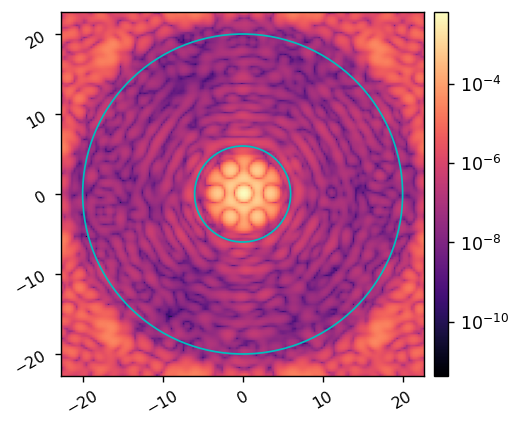

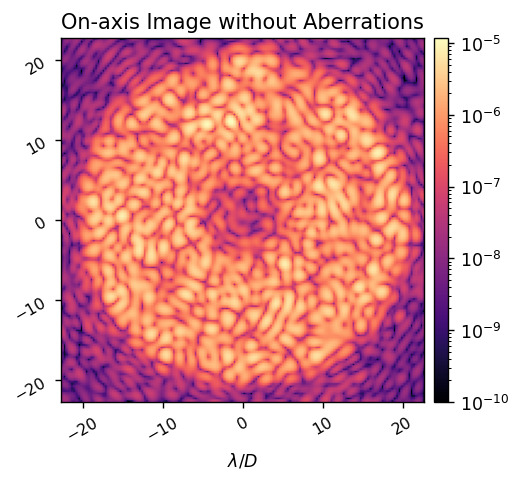

In [4]:
mode = cgi_phasec_poppy.cgi.CGI(cgi_mode='spc-wide', 
                                use_pupil_defocus=True,
                                use_opds=True,
                                dm1_ref=2*dm1_flat,
                                # dm1_ref=dm1_flat, dm2_ref=dm2_flat, 
                                npsf=150)

mode.use_fpm = False
ref_unocc_im = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(ref_unocc_im, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches)

mode.Imax_ref = ref_unocc_im.max()
mode.use_fpm = True

image = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(image, 'On-axis Image without Aberrations', lognorm=True, vmin=1e-10,
        pxscl=mode.psf_pixelscale_lamD, xlabel='$\lambda/D$')

In [3]:
wfs = mode.calc_wfs()

Propagating wavelength 825.000 nm.
PSF calculated in 0.321s


In [25]:
wfs[0].amplitude[800, 602]

array(0.00125709)

array(0.00125709)

array(0.00010432)

array(0.08298855)

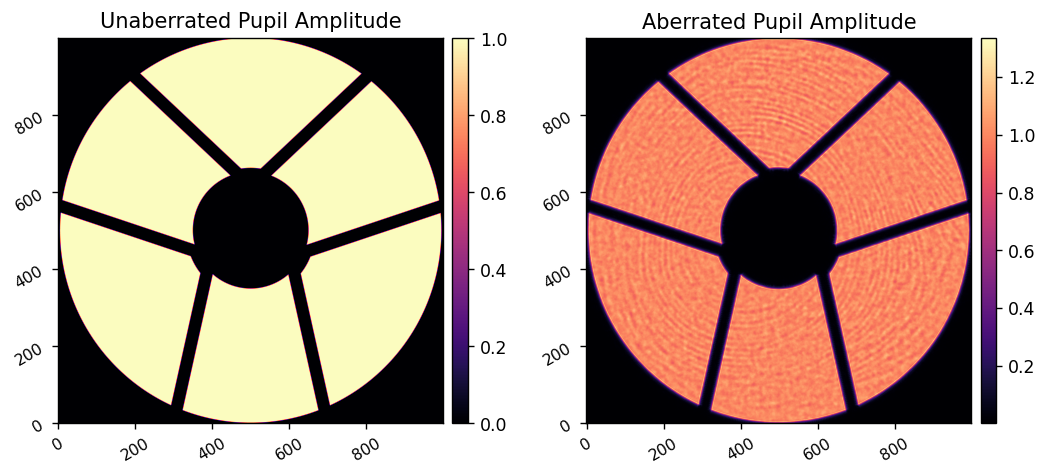

In [35]:
pupil_mean = wfs[0].amplitude[800, 602]
rms_amp_err = xp.sqrt(xp.mean( xp.square((wfs[24].amplitude[pupil_mask] - pupil_mean))))
display(pupil_mean, rms_amp_err, rms_amp_err/pupil_mean)

imshow2(wfs[0].amplitude/pupil_mean, wfs[24].amplitude/pupil_mean, 
        'Unaberrated Pupil Amplitude', 'Aberrated Pupil Amplitude', npix=1000)


In [16]:
xp.sqrt(xp.mean(wfs[0].amplitude[pupil_mask]**2)), xp.mean(wfs[0].amplitude[pupil_mask])


(array(0.00125105), array(0.00124765))

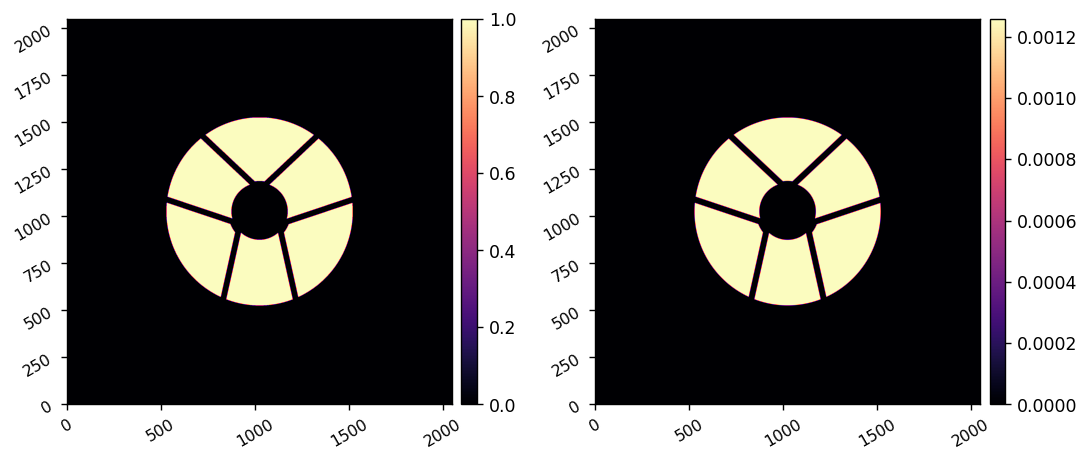

In [13]:
pupil_mask = wfs[0].amplitude>0
imshow2(pupil_mask, wfs[0].amplitude)

In [ ]:
for i,wf in enumerate(wfs):
    print(i)
    imshow2(wf.amplitude, wf.phase, 'Amplitude '+ wf.location, 'Phase '+wf.location, )